# Preprocessing of the CT Scan Data

In [1]:
from importlib import reload
import utils3d
reload(utils3d)
from utils3d import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

## Details of one scan

In [2]:
path = '/nfs/turbo/intmed-bnallamo-turbo/wsliu/Data/CT_scans/'

In [27]:
raw_folder, array_lst, etc_files = next(os.walk(path+'raw2'))
array_lst.sort()

In [28]:
len(etc_files)

0

In [8]:
etc_files[:5]

['s91220.npy', 's96012.npy', 's96056.npy', 's96045.npy', 's91343.npy']

In [9]:
scan_lst[:5]

['s11418', 's13564', 's14226', 's21018', 's21802']

In [10]:
[n for n in scan_lst if n+'.npy' not in etc_files]

['s11418', 's94214', 's95108']

In [4]:
mat_lst = []
for f in scan_lst:
    if not f[:2] == 's9':
        mat_lst.append(f)

In [5]:
mat_lst.remove('s89457')

In [9]:
mat_lst.remove('s11418')

In [29]:
scan = 's94214'

In [6]:
fail_lst = []
for f in mat_lst:
    try:
        scan_path = os.path.join(raw_folder, f)
        mat = sio.loadmat(os.path.join(scan_path, 'VOX.mat'))
    except ValueError:
        fail_lst.append(f)

KeyboardInterrupt: 

In [38]:
fail_lst

['s11418']

In [30]:
scan_path = os.path.join(raw_folder, scan)

In [17]:
ndarray = dcm_to_ndarray(scan_path, target_size=(256, 256, 192))

In [13]:
ndarray = mat_to_ndarray(scan_path, target_size=(256, 256, 192))

In [41]:
os.path.join(scan_path, 'VOX.mat')

'/nfs/turbo/intmed-bnallamo-turbo/wsliu/Data/CT_scans/raw2/s4134/VOX.mat'

In [42]:
mat =  sio.loadmat(os.path.join(scan_path, 'VOX.mat'))

In [6]:
meta = get_metadata(path+'raw/'+scan)

In [31]:
file_lst = []  
for dirName, subdirList, fileList in os.walk(scan_path):
    for filename in fileList:
        if ".dcm" in filename.lower():  
            file_lst.append(os.path.join(dirName,filename))

In [22]:
for f in file_lst[:]:
    dcm = dicom.read_file(f)
    if dcm.Rows>520 or dcm.Rows<504 or dcm.Columns>520 or dcm.Columns<504:
        file_lst.remove(f)

In [22]:
rows = []
for f in file_lst:
    dcm = dicom.read_file(f)
    rows.append(dcm.Rows)

In [32]:
file_lst.sort()

In [33]:
file_lst[:5]

[]

In [14]:
dcm1 = dicom.read_file(file_lst[0])

In [17]:
dcm1.Rows, dcm1.Columns, dcm1.PixelSpacing, dcm1.SliceThickness

(603, 603, ['0.546875', '0.546875'], "2.5")

In [7]:
meta

{'x_dim': 512,
 'x_spacing': 0.703125,
 'y_dim': 512,
 'y_spacing': 0.703125,
 'z_dim': 127,
 'z_spacing': 5.0}

## Batch preprocessing

In [3]:
%matplotlib inline

In [44]:
path = '/nfs/turbo/intmed-bnallamo-turbo/wsliu/Data/CT_scans/'

In [45]:
raw_folder, scan_lst, etc_files = next(os.walk(path+'raw2'))

In [46]:
scan_lst.sort()

In [47]:
len(scan_lst)

1272

In [37]:
scan_lst.index('s88725')

811

In [21]:
scan_lst = scan_lst[:20]

In [48]:
scan_lst[0]

's11418'

In [22]:
x_spacing = []
y_spacing = []
z_spacing = []
x_dim = []
y_dim = []
z_dim = []
extra_dim = []
for scan in scan_lst:
    scan_path = os.path.join(raw_folder, scan)
    meta = get_metadata(scan_path)
    x_spacing.append(meta['x_spacing'])
    y_spacing.append(meta['y_spacing'])
    z_spacing.append(meta['z_spacing'])
    x_dim.append(meta['x_dim'])
    y_dim.append(meta['y_dim'])
    z_dim.append(meta['z_dim'])
    extra_dim.append(meta['extra_dim'])

In [18]:
for scan in mat_lst:
    print(scan)
    scan_path = os.path.join(raw_folder, scan)
    ndarray = mat_to_ndarray(scan_path, target_size=(256, 256, 192))
    np.save(path+'ndarray2/'+scan+'.npy', ndarray)

s13564
s14226
s21018
s21802
s22079
s22322
s22897
s23390


/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


s23425
s25508
s25795
s25812
s25818
s25828
s25902
s26571
s26651
s26670
s26730
s27008
s27310
s28642
s28662
s29522
s29567
s29654
s30666
s30668
s31360
s31474
s31851
s32190
s32296
s32745
s33037
s33090
s33313
s33328
s33332
s34027
s34038
s34263
s34565
s34653
s3939
s4134
s42243
s4558
s4590
s4638
s46470
s4737
s4765
s4781
s4798
s4829
s4935
s4996
s5043
s62225
s62681
s68098
s68109
s68404
s68418
s68597
s68975
s69259
s69307
s69393
s70287
s70848
s70857
s70884
s70905
s70918
s70929
s70931
s70932
s71097
s89487
s89858


In [23]:
meta_df = pd.DataFrame(dict(ID=scan_lst, x_spacing=x_spacing, y_spacing=y_spacing, z_spacing=z_spacing, x_dim=x_dim, 
                            y_dim=y_dim, z_dim=z_dim, extra_dim=extra_dim))

In [24]:
meta_df

,ID,extra_dim,x_dim,x_spacing,y_dim,y_spacing,z_dim,z_spacing
0,s17313,False,512,0.703125,512,0.703125,191,2.500
1,s19382,False,512,0.664062,512,0.664062,421,1.250
2,s25054,False,512,0.664062,512,0.664062,173,2.500
3,s25080,False,512,0.742188,512,0.742188,180,2.500
4,s25223,False,512,0.742188,512,0.742188,863,0.625
5,s25426,False,512,0.683594,512,0.683594,739,0.625
6,s26218,False,512,0.781250,512,0.781250,796,0.625
7,s26696,False,512,0.625000,512,0.625000,800,0.625
8,s26984,False,512,0.703125,512,0.703125,85,5.000
9,s27029,False,512,0.781250,512,0.781250,785,0.625


In [19]:
meta_df.to_csv('output/meta_data.csv', index=False)

In [17]:
meta_df = pd.read_csv('output/meta_data.csv')

In [15]:
meta_df.shape

(2205, 8)

In [12]:
meta_df.head()

,ID,extra_dim,x_dim,x_spacing,y_dim,y_spacing,z_dim,z_spacing
0,s17313,False,512,0.703125,512,0.703125,191,2.500
1,s19382,False,512,0.664062,512,0.664062,421,1.250
2,s25054,False,512,0.664062,512,0.664062,173,2.500
3,s25080,False,512,0.742188,512,0.742188,180,2.500
4,s25223,False,512,0.742188,512,0.742188,863,0.625


## Combining MetaData

In [51]:
meta_dcm = pd.read_csv('./output/meta_dcm/meta_datadcm23.csv')

In [52]:
meta_mat = pd.read_csv('./output/meta_mat/meta_data1.csv')

In [58]:
meta1 = pd.read_csv('./output/meta_data.csv')

In [63]:
meta_dcm = meta_dcm.drop(columns=['Unnamed: 0'])

In [66]:
meta_mat = meta_mat.drop(columns=['Unnamed: 0'])

In [72]:
meta = pd.concat([meta_dcm, meta_mat, meta1], ignore_index=True)

In [74]:
ids = meta.ID.values

In [75]:
ids

array(['s91122', 's91123', 's91124', ..., 's91119', 's91120', 's91121'], dtype=object)

In [76]:
f, sf, array_lst1 = next(os.walk(path+'ndarray'))

In [79]:
f, sf, array_lst2 = next(os.walk(path+'ndarray2'))

In [81]:
array_lst = array_lst1 + array_lst2

In [83]:
id_lst = [os.path.splitext(s)[0] for s in array_lst]

In [85]:
check = [n for n in ids if not n in id_lst]

In [88]:
len(id_lst), len(ids)

(3474, 3474)

In [89]:
[n for n in array_lst if array_lst.count(n)>1]

[]

In [90]:
meta = meta.sort_values(by=['ID'])

In [91]:
meta.to_csv('./output/meta_data.csv', index=False)

In [92]:
meta.shape

(3474, 8)

## Label Preprocessing

In [9]:
import math

In [3]:
labels = pd.read_excel(path+'K23_Crohn_RadiologyReport_Labels_27MAR2018.xlsx')

In [4]:
labels.head()

,Database_ID,StudyID,Ileum,ascending,transverse,Descending,Sigmoid,rectum,prox_small_bowel,Prox_Ileum,...,Pouch,CD_Active_AnyLocation,CD_Active_SmallBowel,CD_Active_RtColon,CD_Active_LtColon,CD_Active_Pancolitis,Fistula_Any,Abscess_any,Stricture_Suspected,Surgery_Prior_Any
0,67,88933.0,True,False,False,False,False,False,False,False,...,False,1,1,0,0,0,0,0,0,0
1,68,88867.0,False,False,False,False,False,False,False,False,...,False,0,0,0,0,0,0,0,0,1
2,69,44653.0,True,False,False,False,False,False,False,False,...,False,1,1,0,0,0,0,0,1,1
3,70,88736.0,True,False,False,False,False,False,False,False,...,False,1,1,0,0,0,1,0,0,1
4,71,88747.0,False,False,False,False,False,False,False,False,...,False,0,0,0,0,0,0,0,0,1


In [5]:
labels.shape

(4361, 33)

In [8]:
labels.StudyID.values

array([ 88933.,  88867.,  44653., ...,     nan,     nan,     nan])

In [15]:
label_id = ['s'+str(int(n)) for n in labels.StudyID.values if not math.isnan(n)]

In [16]:
label_id.sort()

In [17]:
len(label_id)

3480

In [27]:
dup = [n for n in label_id if label_id.count(n)>1]

In [29]:
dup_float = [float(n[1:]) for n in dup]

In [32]:
labels[labels['StudyID'].isin(dup_float)]

,Database_ID,StudyID,Ileum,ascending,transverse,Descending,Sigmoid,rectum,prox_small_bowel,Prox_Ileum,...,Pouch,CD_Active_AnyLocation,CD_Active_SmallBowel,CD_Active_RtColon,CD_Active_LtColon,CD_Active_Pancolitis,Fistula_Any,Abscess_any,Stricture_Suspected,Surgery_Prior_Any
1819,1141,92866.0,False,False,True,True,False,True,False,False,...,False,1,0,1,1,0,0,0,0,0
1820,1142,92866.0,False,False,True,True,False,True,False,False,...,False,1,0,1,1,0,0,0,0,0
2011,2005,93241.0,False,False,False,False,False,False,False,False,...,False,0,0,0,0,0,0,0,0,0
2012,2004,93241.0,False,False,False,False,False,False,False,False,...,False,0,0,0,0,0,0,1,0,0
2109,2378,93461.0,True,False,False,False,False,False,False,False,...,False,1,1,0,0,0,0,1,0,0
2110,2379,93461.0,True,False,False,False,False,False,False,False,...,False,1,1,0,0,0,0,1,0,0


In [14]:
meta = pd.read_csv('output/meta_data.csv')

In [18]:
meta_id = meta.ID.values

In [22]:
check = [n for n in label_id if not n in meta_id]

In [23]:
check

['s11418', 's94214', 's95108']

In [24]:
common = [n for n in meta_id if n in label_id]

In [25]:
len(common)

3474

## Visualization

In [21]:
array_folder, etc_folder, array_lst = next(os.walk(path+'ndarray'))

In [23]:
array_lst.sort()

In [25]:
len(array_lst)

2205

In [3]:
scan = 's26984'

In [5]:
meta = get_metadata(path+'raw/'+scan)

In [4]:
ndarray = np.load(path+'ndarray/'+scan+'.npy')

In [14]:
meta = get_metadata(scan_path, 'mat')

In [6]:
meta

{'extra_dim': False,
 'x_dim': 512,
 'x_spacing': 0.703125,
 'y_dim': 512,
 'y_spacing': 0.703125,
 'z_dim': 85,
 'z_spacing': 5.0}

In [96]:
ndarray = dcm_to_ndarray(path+'raw/'+scan, target_size=(256, 256, 192))

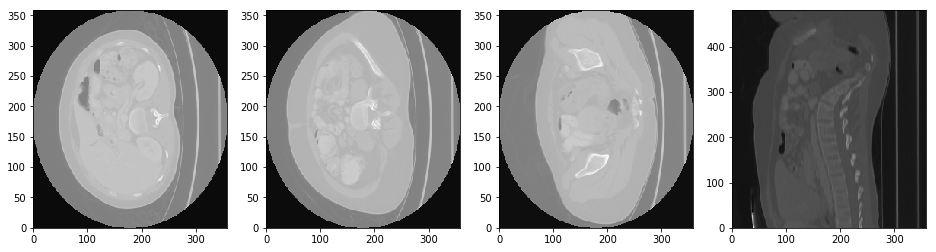

In [17]:
plot_ndarray(ndarray)

In [15]:
x = np.linspace(0, (meta['x_dim']+1)*meta['x_spacing'], num = 256)
y = np.linspace(0, (meta['y_dim']+1)*meta['y_spacing'], num = 256)
z = np.linspace(0, (meta['z_dim']+1)*meta['z_spacing'], num = 192)

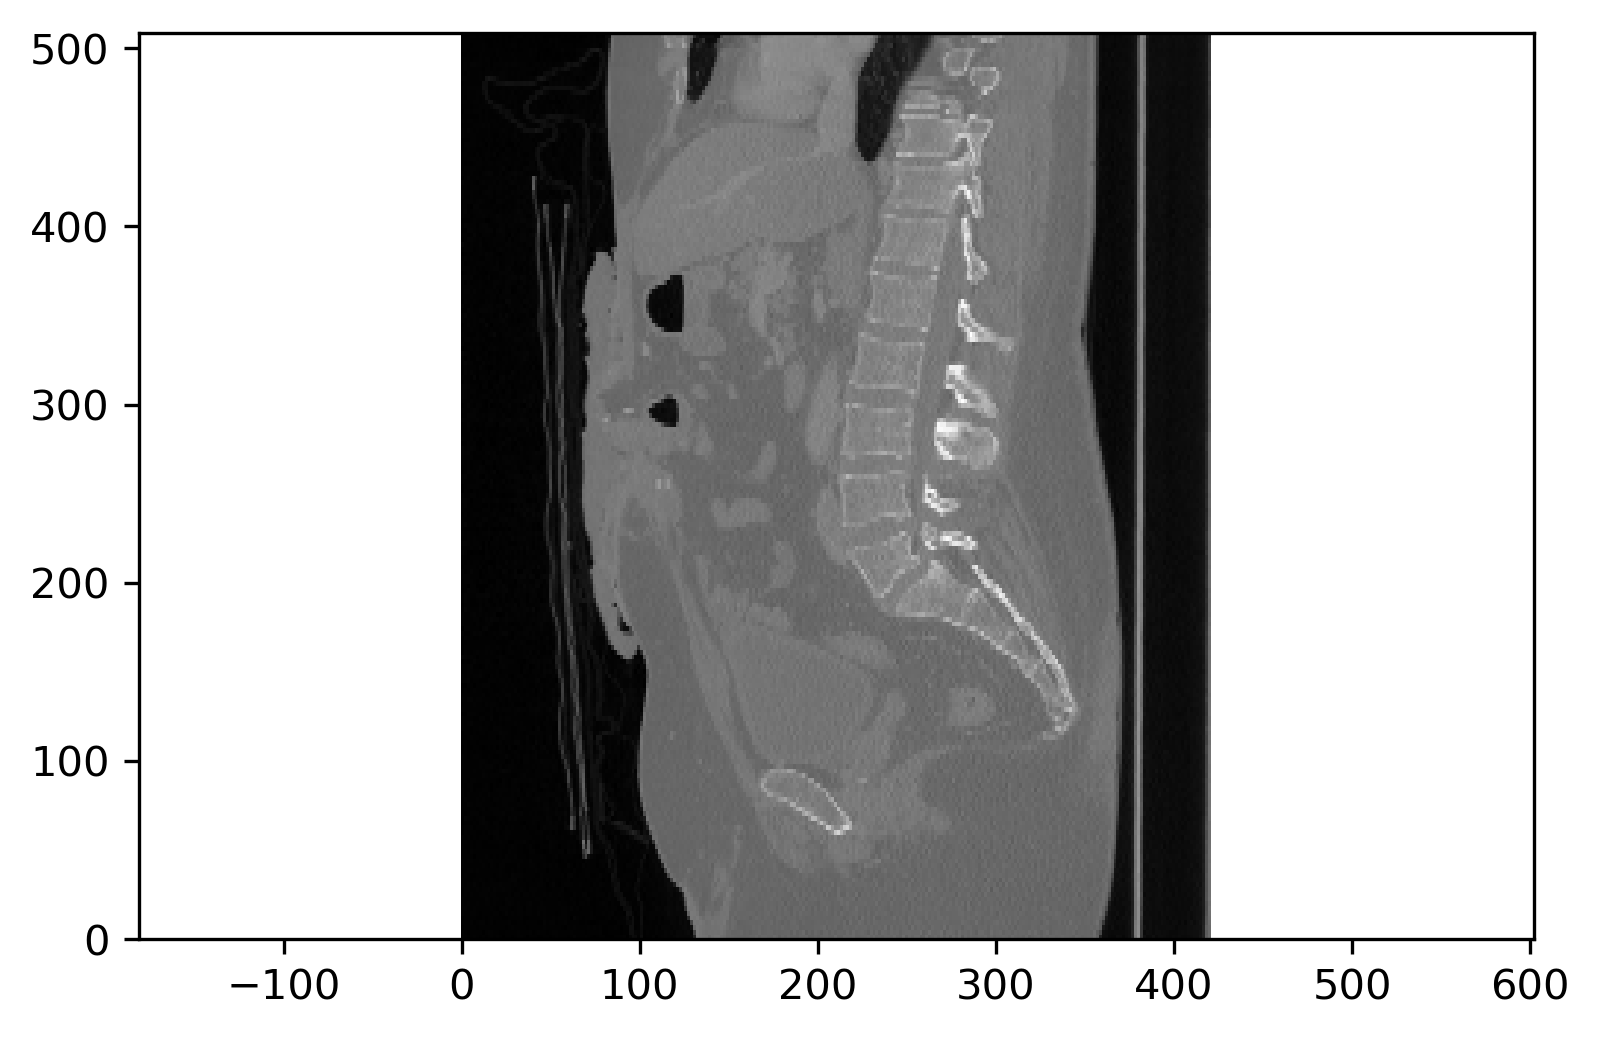

In [16]:
plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, z, np.transpose(ndarray[:, 128, :]));